In [3]:
import nibabel as nib
import numpy as np
mr_img_normal = nib.load('../data/IXI364-Guys-0920-T1.nii')
mr_img_defaced = nib.load('../data/IXI364-Guys-0920-T1_defaced.nii')
#mr_img_mask = nib.load('../data/IXI364-Guys-0920-T1_mask.nii')
mr_img_mask_pred = nib.load('../3D_test/IXI101-Guys-0749-T1_mask_pred.nii')
norm_data = mr_img_normal.get_data()
def_data = mr_img_defaced.get_data()
#mask_data = mr_img_mask.get_data()
pred_mask_data = mr_img_mask_pred.get_data()
print(mr_img_normal.shape)
print(mr_img_defaced.shape)

(256, 256, 150)
(256, 256, 150)


In [4]:
import os
# Check size to save
img = norm_data
print(img.dtype)
print((mask_data.astype(np.int16)).dtype)
img_nii = nib.Nifti1Image(img, mr_img_normal.affine)#np.eye(4))
img_nii.to_filename(os.path.join('.', 'norm.nii'))

int16


NameError: name 'mask_data' is not defined

In [2]:
import numpy as np
print(np.max(norm_data))
print(np.min(norm_data))
norm_data2 = (norm_data - np.min(norm_data))/(np.max(norm_data)-np.min(norm_data))
def_data2 = (def_data - np.min(def_data))/(np.max(def_data)-np.min(def_data))

print(np.max(norm_data2))
print(np.min(norm_data2))

3238.0239210128784
0.0
1.0
0.0


In [5]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")


(256, 256)


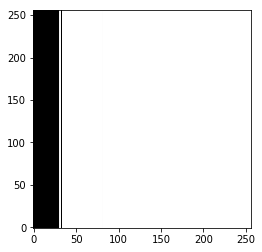

In [17]:
pred_mask_slice = pred_mask_data[:,:,]
print(pred_mask_slice.shape)
show_slice(pred_mask_slice)

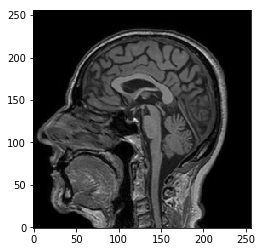

In [3]:
#norm_arr = [#norm_data2[127, :, :],
            #norm_data2[:, 127, :],
            #norm_data2[:, :, 74]]
norm = norm_data[:, :, 74]
show_slice(norm)

In [2]:
# Predicted Mask 
mr_img_pmask = nib.load('../d_mask.nii')
pmask_data = mr_img_pmask.get_data()
show_slice(pmask_slice)


NameError: name 'nib' is not defined

0.8794708251953125


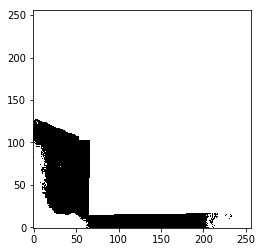

In [19]:
# Look @ mask
label_mask_slice = mask_data[:, :, 74]
show_slice(label_mask_slice)
# Check percentage of 0s to 1s
num_ones = np.where(label_mask_slice == 1)[1].shape[0]
total = np.prod(label_mask_slice.shape)
print(num_ones/total)

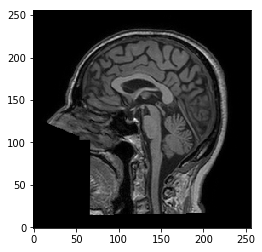

In [5]:
def_arr = [#def_data[127, :, :],
            #def_data[:, 127, :],
            def_data[:, :, 74]]
#show_slices(def_arr)
def_slice = def_data[:, :, 74]
show_slice(def_slice)

0

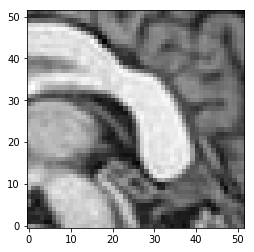

In [7]:
def_chunk = def_slice[128:180,128:180]
norm_chunk = norm[128:180,128:180]
show_slice(def_chunk)
show_slice(norm_chunk)

np.sum(def_chunk == norm_chunk)


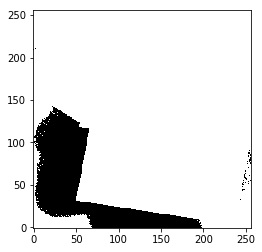

In [15]:
## Create Mask
del mask_slice
# reconstruction of norm part in def_slice isn't exact in def slice so the values not suppose
# to be touched vary. The defaced part of def is definitely 0. So by normalizing
mask_slice = def_slice - norm
mask_slice[mask_slice >= 0] = 1
mask_slice[mask_slice < 0] = 0
show_slice(mask_slice)
#print(mask_slice[0:30,0:30])


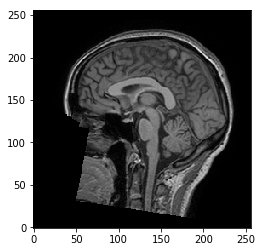

In [19]:
applied_mask = np.multiply(mask_slice, norm)
show_slice(applied_mask)
